In [40]:
#Importing libraries

from sklearn.ensemble                   import RandomForestRegressor
from sklearn.ensemble                   import BaggingRegressor
from sklearn.tree                       import DecisionTreeRegressor
from sklearn.metrics                    import mean_squared_error
from sklearn.metrics                    import roc_auc_score,roc_curve
from sklearn.model_selection            import train_test_split
from sklearn                            import linear_model
from sklearn.neighbors                  import KNeighborsRegressor
from sklearn.svm                        import LinearSVR
from sklearn.model_selection            import GridSearchCV
from math                               import sqrt

import pandas              as pd
import numpy               as np
import matplotlib.pyplot   as plt

In [2]:
#Reading data set

lv_energy_df = pd.read_csv('/Users/ujjwalrohit/Dataset for machine Learning/ENB2012_data.csv')


In [3]:
#Displaying the characteristics of the energy data set

print("Dimension of the data set:",lv_energy_df.shape)
print("Names of the variables in the data set are",lv_energy_df.columns)
print("The information of the data set are",lv_energy_df.info())

Dimension of the data set: (768, 10)
Names of the variables in the data set are Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
The information of the data set are None


In [4]:
#Check the Nan and Null values in the data set

print("The Null values in the dataset are :\n",lv_energy_df.isnull().sum())
print("The Nan values in the dataset are :\n",lv_energy_df.isna().sum())

The Null values in the dataset are :
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64
The Nan values in the dataset are :
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [10]:
#Using a random seed function for generating the same data set

np.random.seed(3000)

lv_training,lv_test = train_test_split(lv_energy_df,test_size = 0.3,random_state = 0)

lv_x_train = lv_training.drop(['Y2'],axis = 1)
lv_y_train = lv_training['Y2']

lv_x_test = lv_test.drop(['Y2'],axis = 1)
lv_y_test = lv_test['Y2']

In [11]:
#Creating a Random Forest model

print("---------------------------RANDOM FOREST MODEL------------------")
lv_energy_forest = RandomForestRegressor()
lv_energy_forest.fit(lv_x_train,lv_y_train)

---------------------------RANDOM FOREST MODEL------------------


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [12]:
#Displaying Accuracy of the random forest model

print("Accuracy on training data set:",lv_energy_forest.score(lv_x_train,lv_y_train))
print("Accuracy on test data set:",lv_energy_forest.score(lv_x_test,lv_y_test))

Accuracy on training data set: 0.9971503019921341
Accuracy on test data set: 0.9782031222051971


In [13]:
#Make prediction on test set and Calculate RMSE for the model

print("RMSE value for Random forest model :",
     sqrt(mean_squared_error(lv_y_test,lv_energy_forest.predict(lv_x_test))))

RMSE value for Random forest model : 1.4021611056783263


In [15]:
#Creating a new random forest model with best parameters

print("-----------------RANDOM FOREST MODEL WiTH BEST PARAMETERS--------------")

lv_param_grid = {'n_estimators':[10,20,30],
                 'max_features':["auto","sqrt","log2"],
                 'max_depth' :[4,6,8],
                 'min_samples_split':[0.05,0.10]
}

lv_energy_forest_grid = RandomForestRegressor()
lv_energy_forest_grid_cv = GridSearchCV(estimator=lv_energy_forest_grid,
                                        param_grid= lv_param_grid,cv=5)

lv_energy_forest_grid_cv.fit(lv_x_train,lv_y_train)

print("Best Parameters:\n",lv_energy_forest_grid_cv.best_params_)



-----------------RANDOM FOREST MODEL WiTH BEST PARAMETERS--------------
Best Parameters:
 {'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 0.05, 'n_estimators': 30}


In [17]:
#Creating the model with best scores

lv_energy_forest_best = RandomForestRegressor(
n_estimators=lv_energy_forest_grid_cv.fit(lv_x_train,lv_y_train).best_params_['n_estimators'],
max_depth = lv_energy_forest_grid_cv.fit(lv_x_train,lv_y_train).best_params_['max_depth'],
max_features= lv_energy_forest_grid_cv.fit(lv_x_train,lv_y_train).best_params_['max_features'],
min_samples_split=lv_energy_forest_grid_cv.fit(lv_x_train,lv_y_train).best_params_['min_samples_split']    
)

In [24]:
#Evaluating the model considering best parameters 

lv_energy_forest_best.fit(lv_x_train,lv_y_train)

print("Accuracy on training set with best parameters :",
      lv_energy_forest_best.score(lv_x_train,lv_y_train ))
      
print("Accuracy on test set with best parameters :",
      lv_energy_forest_best.score(lv_x_test,lv_y_test))      

Accuracy on training set with best parameters : 0.9772021282666802
Accuracy on test set with best parameters : 0.9707014241303262


In [25]:
#Make prediction on test set and Calculate RMSE for the new model

print('RMSE value for new random forest model:',sqrt(mean_squared_error(lv_y_test,
                                            lv_energy_forest_best.predict(lv_x_test))))

RMSE value for new random forest model: 1.6256386901168505


In [27]:
#Creating a Bagging model

print("--------------------BAGGING MODEL---------------------------")

lv_energy_bag = BaggingRegressor(random_state=0)
lv_energy_bag.fit(lv_x_train,lv_y_train)

print("Accuracy of bagging model on training data set:",lv_energy_bag.score(lv_x_train,
                                                                           lv_y_train))

print("Accuracy of bagging model on test data set :",lv_energy_bag.score(lv_x_test,
                                                                        lv_y_test))

print("RMSE value for new random forest model:",
      sqrt(mean_squared_error(lv_y_test,lv_energy_bag.predict(lv_x_test))))

--------------------BAGGING MODEL---------------------------
Accuracy of bagging model on training data set: 0.9963830682997958
Accuracy of bagging model on test data set : 0.9765267569039104
RMSE value for new random forest model: 1.4550815020091412


In [29]:
#Creating a decision tree model

print("---------------DECISION TREE MODEL---------------------------")

lv_energy_decision_tree = DecisionTreeRegressor()
lv_energy_decision_tree.fit(lv_x_train,lv_y_train)

print("Features of the decision tree model for energy data set are:",
     lv_energy_decision_tree.feature_importances_)

print("RMSE value for decision tree model are :",
     sqrt(mean_squared_error(lv_y_test,lv_energy_decision_tree.predict(lv_x_test))))

---------------DECISION TREE MODEL---------------------------
Features of the decision tree model for energy data set are: [0.00516619 0.00317379 0.00325146 0.00129588 0.         0.00110543
 0.00675325 0.00183113 0.97742287]
RMSE value for decision tree model are : 1.9335289496498878


In [32]:
#Creating a linear regression model

print("------------------LINEAR REGRESSION MODEL---------------")

lv_energy_linear = linear_model.LinearRegression()
lv_energy_linear.fit(lv_x_train,lv_y_train)

print("Accuracy of training dataset is:",lv_energy_linear.score(lv_x_train,lv_y_train))
print("Accuracy of test dataset is:",lv_energy_linear.score(lv_x_test,lv_y_test))

print('Coefficient of independent variables:\n',lv_energy_linear.coef_)
print("Intercept in the model :",lv_energy_linear.intercept_)

print("RMSE value for linear model is :"
      ,sqrt(mean_squared_error(lv_y_test,lv_energy_linear.predict(lv_x_test))))

------------------LINEAR REGRESSION MODEL---------------
Accuracy of training dataset is: 0.9574816632841063
Accuracy of test dataset is: 0.9604208172794635
Coefficient of independent variables:
 [-1.41592047e+01 -1.02804095e-02 -1.02885990e-02  4.09477870e-06
  6.53934316e-01  1.84523890e-01 -2.90376633e+00 -1.44569418e-01
  8.90703796e-01]
Intercept in the model : 22.8263421598355
RMSE value for linear model is : 1.8894446867396306


--------------------KNN Model for Regression-------------------
The Least RMSE value using KNN is  1.7074850496578864


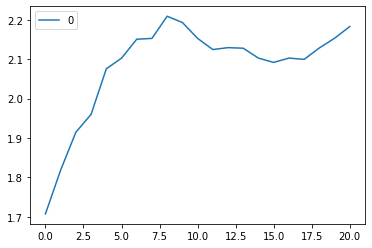

In [38]:
#Creating a KNN model for Regression

print("--------------------KNN Model for Regression-------------------")


lv_energy_knn_list = []

for k in range(21):
    k = k + 1
    lv_energy_knn = KNeighborsRegressor(n_neighbors=k)
    lv_energy_knn.fit(lv_x_train,lv_y_train)
    lv_knn_rmse = sqrt(mean_squared_error(lv_y_test,lv_energy_knn.predict(lv_x_test)))
    lv_energy_knn_list.append(lv_knn_rmse)
    

print("The Least RMSE value using KNN is ",min(lv_energy_knn_list))

lv_curve = pd.DataFrame(lv_energy_knn_list)
lv_curve.plot()
    



In [39]:
#Support Vector Machines for Regression 

print("------------SVM REGRESSIONS-----------------------")

lv_energy_svr = LinearSVR(random_state=0)
lv_energy_svr.fit(lv_x_train,lv_y_train)

print("RMSE value for Support Vector Machines is :",
     sqrt(mean_squared_error(lv_y_test,lv_energy_svr.predict(lv_x_test))))

------------SVM REGRESSIONS-----------------------
RMSE value for Support Vector Machines is : 1.9433600501961545


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
